## Khám phá và làm sạch dữ liệu




In [ ]:
#khai bao thu vien
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Data.csv')
df.head()

ParserError: ignored

In [ ]:
#df.dropna(axis=1,inplace=True)
df.info()
# không có dữ liệu nào bị thiếu 


NameError: ignored

 * Trực quan hóa 

In [ ]:
df.columns = ['date']
df['date'] = pd.to_datetime(df['date'])
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['day'] = df.date.dt.day
years = df['year'].unique()
df.head(15)

NameError: ignored

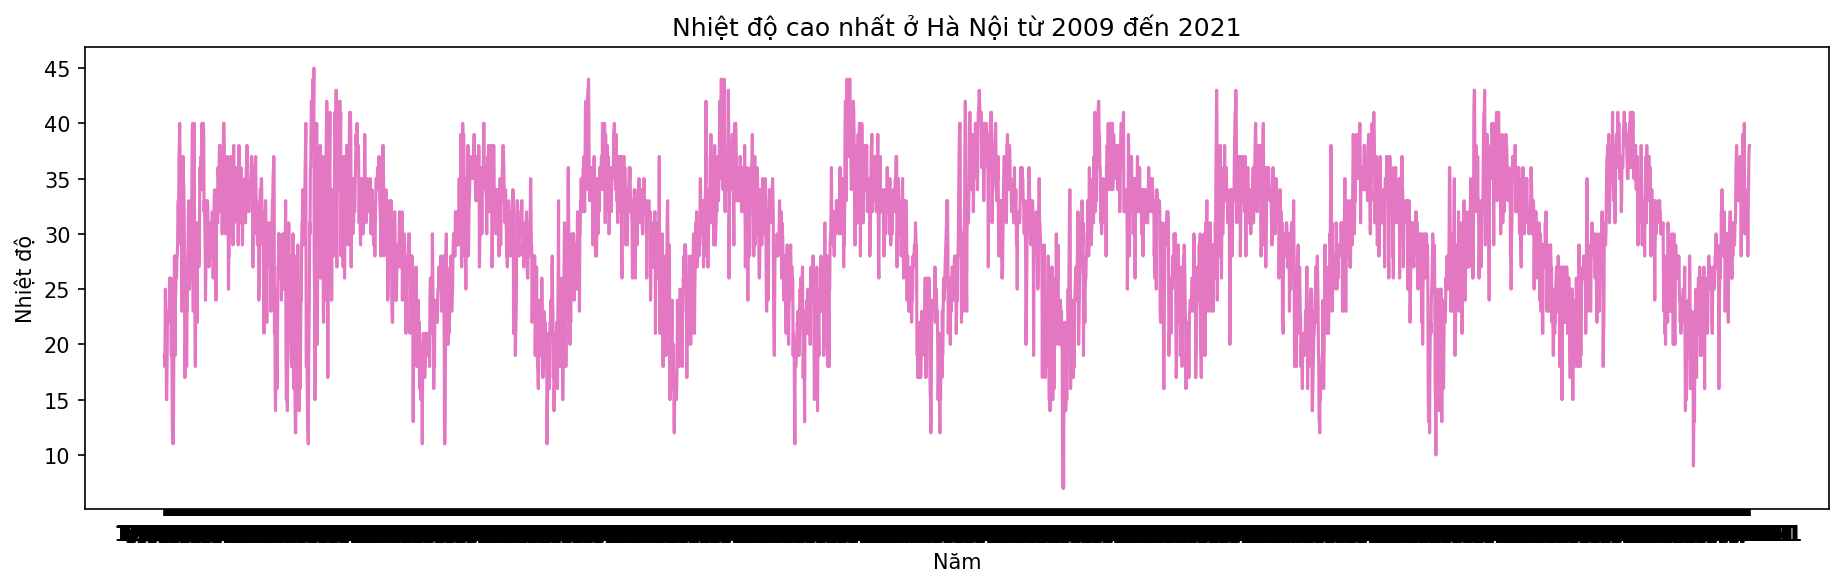

In [ ]:
def plot_df(df, x,y, title="", xlabel='Năm', ylabel='Nhiệt độ', dpi=150, color="blue"):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color=color)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
plot_df(df,x=df['date'], y=df['max'], title='Nhiệt độ cao nhất ở Hà Nội từ 2009 đến 2021', color="tab:pink")

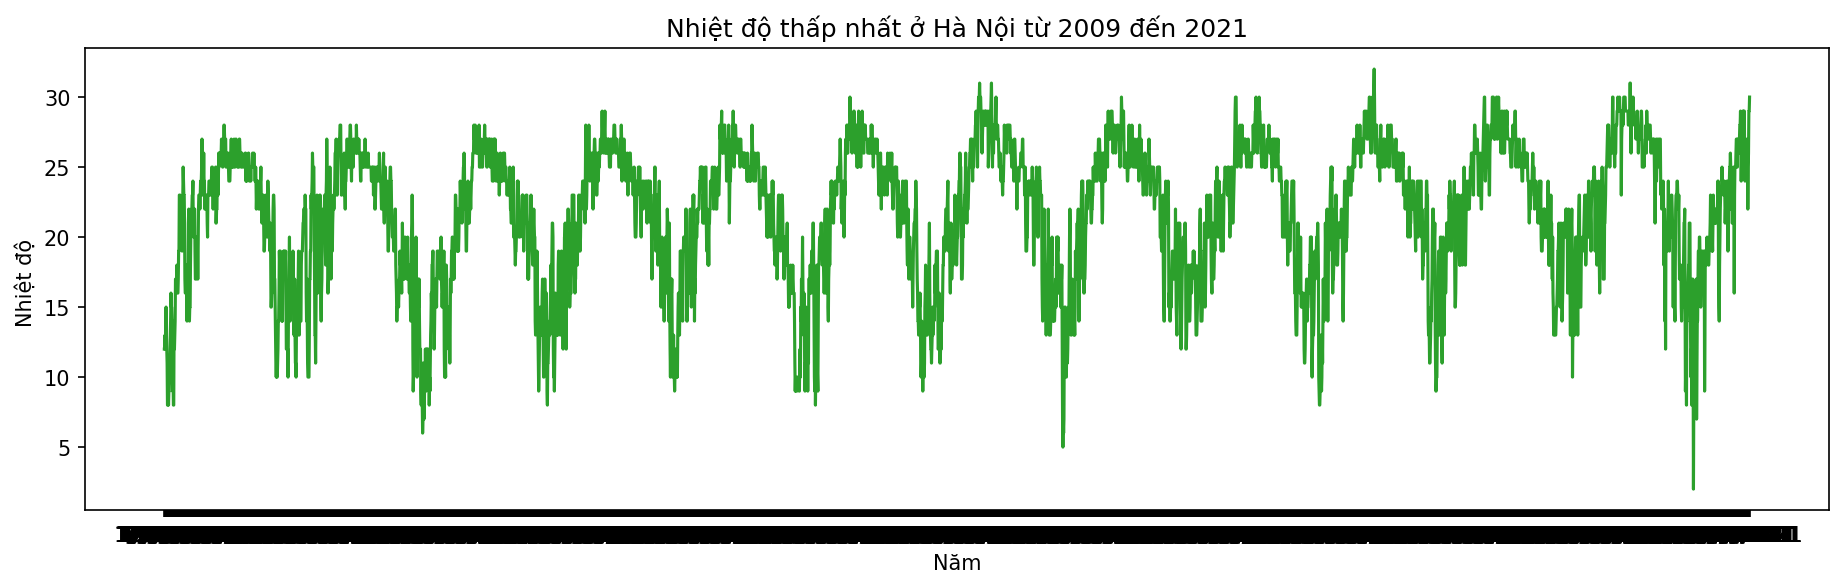

In [ ]:
def plot_df(df, x,y, title="", xlabel='Năm', ylabel='Nhiệt độ ', dpi=150, color="blue"):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color=color)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
plot_df(df,x=df['date'], y=df['min'], title='Nhiệt độ thấp nhất ở Hà Nội từ 2009 đến 2021', color="tab:green")

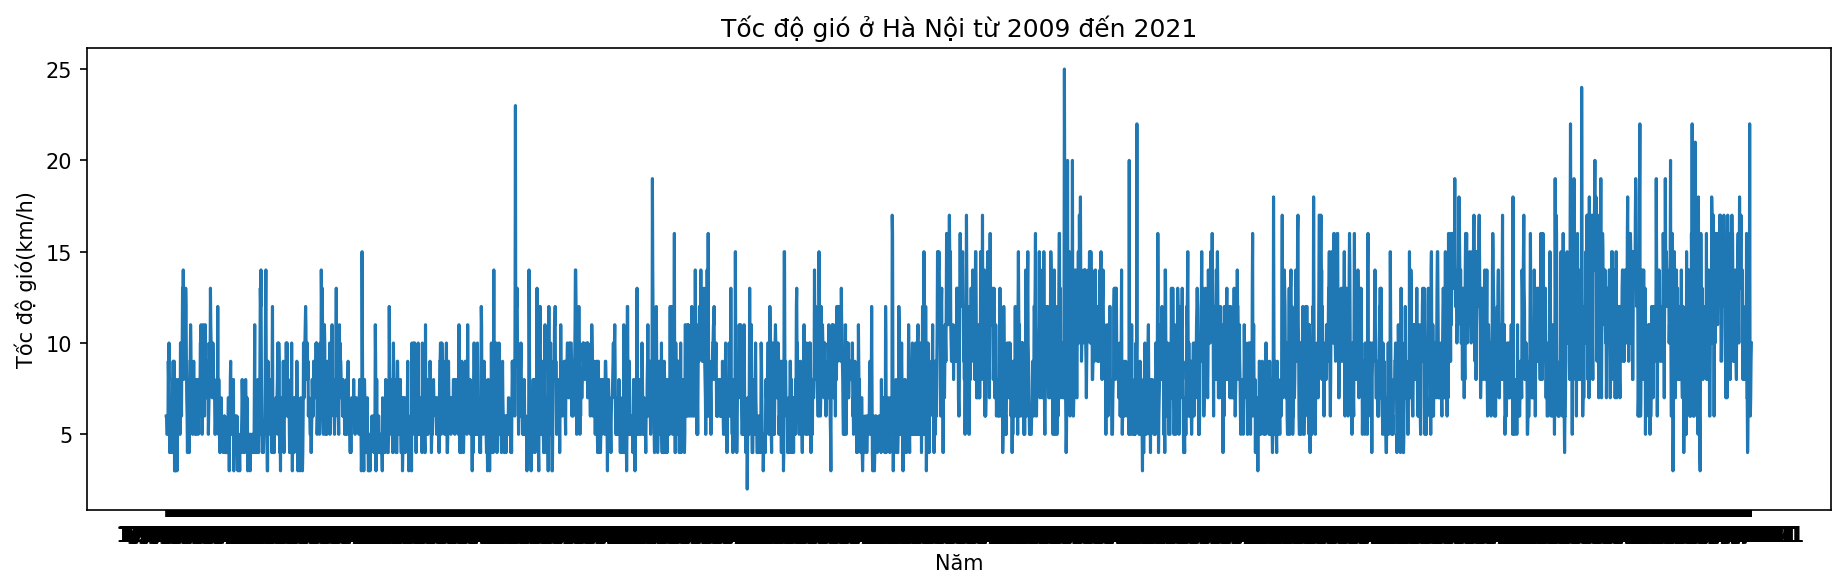

In [ ]:
def plot_df(df, x,y, title="", xlabel='Năm', ylabel='Tốc độ gió(km/h)', dpi=150, color="blue"):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color=color)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
plot_df(df,x=df['date'], y=df['wind'], title='Tốc độ gió ở Hà Nội từ 2009 đến 2021', color="tab:blue")

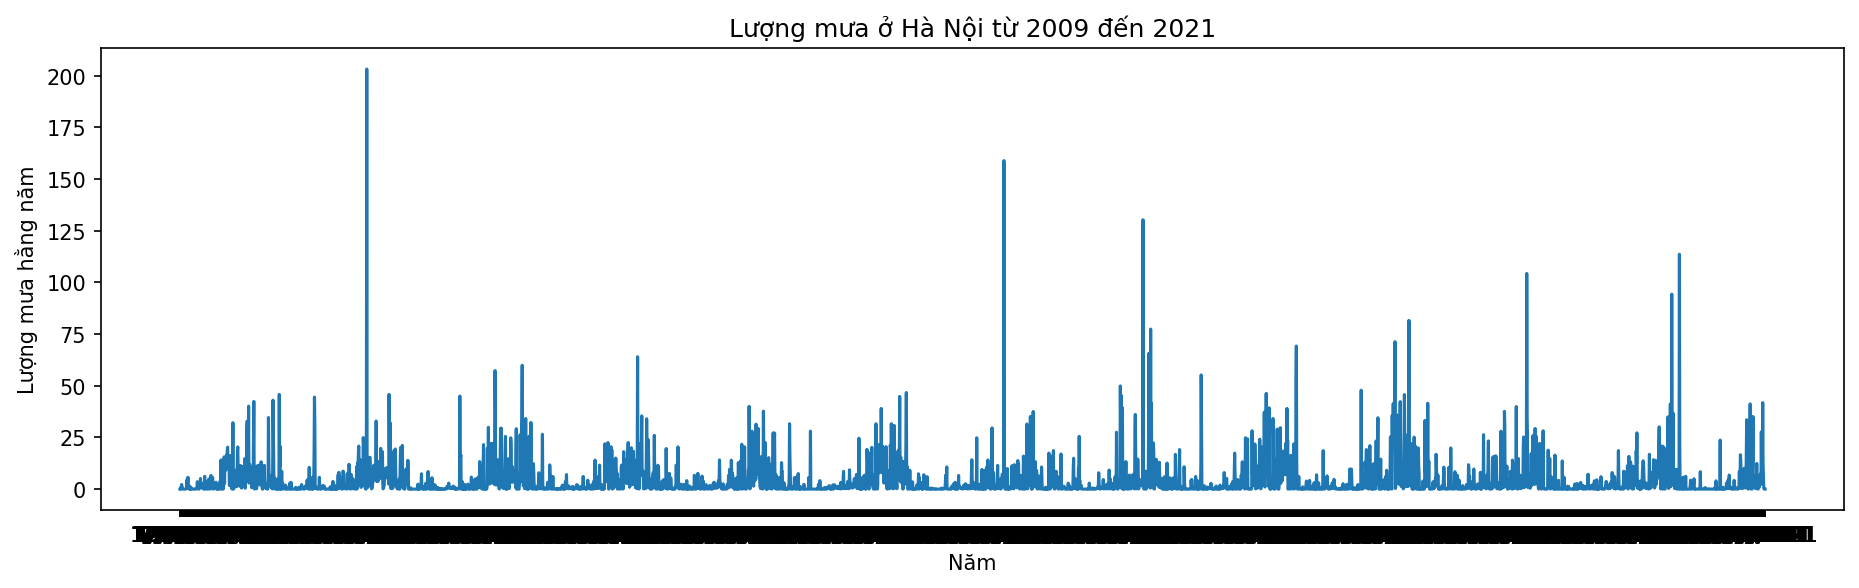

In [ ]:
def plot_df(df, x,y, title="", xlabel='Năm', ylabel='Lượng mưa hằng năm', dpi=150, color="blue"):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color=color)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
plot_df(df,x=df['date'], y=df['rain'], title='Lượng mưa ở Hà Nội từ 2009 đến 2021', color="tab:blue")

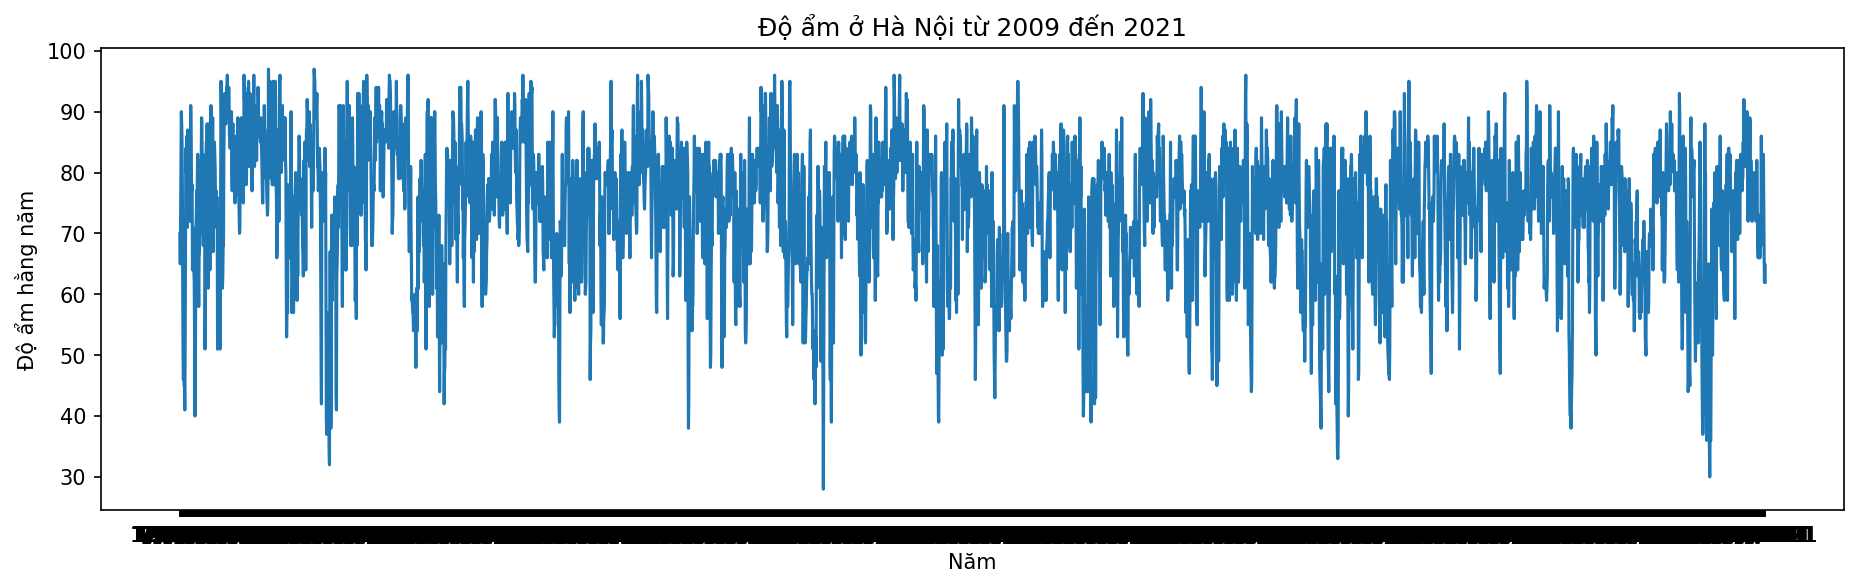

In [ ]:
def plot_df(df, x,y, title="", xlabel='Năm', ylabel='Độ ẩm hằng năm', dpi=150, color="blue"):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color=color)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
plot_df(df,x=df['date'], y=df['humidi'], title='Độ ẩm ở Hà Nội từ 2009 đến 2021', color="tab:blue")

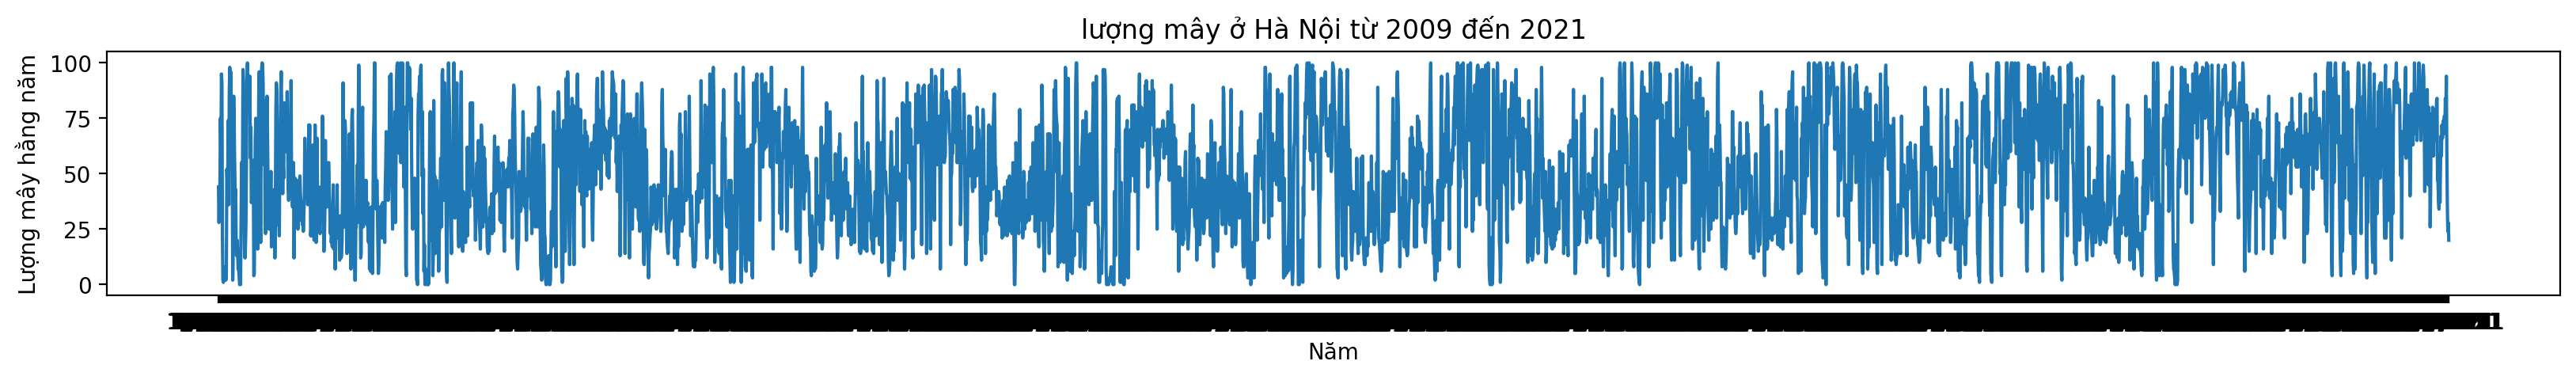

In [ ]:
def plot_df(df, x,y, title="", xlabel='Năm', ylabel='Lượng mây hằng năm', dpi=200, color="blue"):
    plt.figure(figsize=(20,10), dpi=dpi)
    plt.plot(x, y, color=color)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
plot_df(df,x=df['date'], y=df['cloud'], title='lượng mây ở Hà Nội từ 2009 đến 2021', color="tab:blue")

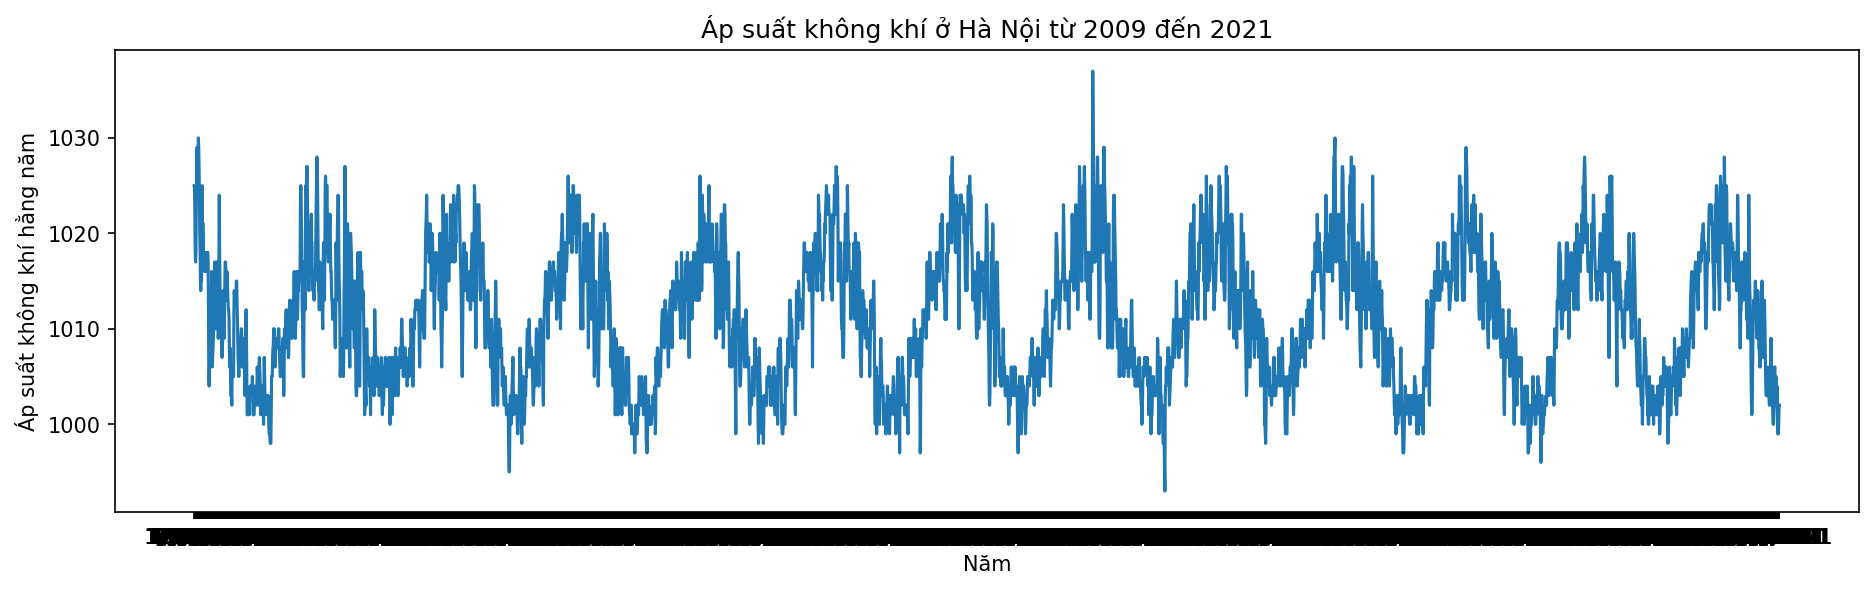

In [ ]:
def plot_df(df, x,y, title="", xlabel='Năm', ylabel='Áp suất không khí hằng năm', dpi=150, color="blue"):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color=color)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
plot_df(df,x=df['date'], y=df['pressure'], title='Áp suất không khí ở Hà Nội từ 2009 đến 2021', color="tab:blue")